In [41]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf 
%matplotlib inline
from tensorflow.keras import layers, models

In [42]:
image_train = pd.read_csv('train.csv')
image_test = pd.read_csv('test.csv')

In [43]:
image_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = image_train.iloc[:,1:].values
y = image_train.iloc[:,0].values

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [47]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [48]:
y_train

array([6, 6, 4, ..., 9, 0, 9], dtype=int64)

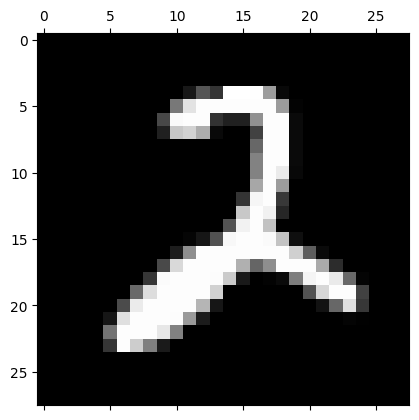

In [49]:
# Reshape the 1D array into a 2D array
image_matrix = x_train[5].reshape((28, 28))
# Display the reshaped image using matshow
plt.matshow(image_matrix, cmap='gray') 
plt.show()


In [50]:
y_train[5]

2

In [51]:
x_train.shape

(33600, 28, 28, 1)

In [52]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [53]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(x_train, y_train, epochs=15)

Epoch 1/15
1050/1050 [==============================] - 16s 14ms/step - loss: 0.1858 - accuracy: 0.9440
Epoch 2/15
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0586 - accuracy: 0.9815
Epoch 3/15
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0404 - accuracy: 0.9876
Epoch 4/15
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0293 - accuracy: 0.9905
Epoch 5/15
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0212 - accuracy: 0.9928
Epoch 6/15
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0183 - accuracy: 0.9939
Epoch 7/15
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0128 - accuracy: 0.9959
Epoch 8/15
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 9/15
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0102 - accuracy: 0.9963
Epoch 10/15
1050/1050 [==============================] - 20s 19m

In [54]:
y_predicted = cnn.predict(x_test)

263/263 [==============================] - 2s 7ms/step


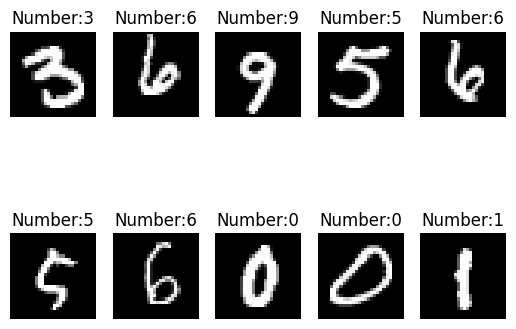

In [55]:
for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns, i+1 is the current subplot index
    plt.title(f'Number:{np.argmax(y_predicted[i])}')
    
    image_matrix = x_test[i].reshape((28, 28))
    plt.imshow(image_matrix, cmap='gray')
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()

In [56]:
cnn.evaluate(x_test,y_test)

263/263 [==============================] - 2s 6ms/step - loss: 0.0643 - accuracy: 0.9874


[0.06428927928209305, 0.9873809814453125]

In [57]:
cnn.save("cnn_model.h5")

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
